In [97]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv('internship_train.csv')
targets = df['target']
#dataset.isna().sum()
df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,328,44,320,364,7,73,4.898979,0.563878,1,315,...,0.266362,6.185887,7.716837,10.144664,1.711649,3.849704,12.401903,14.195540,2.371207,24.563878
89996,217,472,174,327,255,389,-3.605551,0.861690,0,144,...,5.147059,4.209660,14.482770,1.375031,6.386263,10.107582,12.637902,6.576331,6.863238,13.861690
89997,189,406,213,57,494,190,6.164414,0.633704,1,221,...,14.902807,2.886534,8.683168,4.522339,1.556421,10.971184,7.792226,8.422623,3.041409,38.633704
89998,418,478,163,35,390,77,-3.605551,0.687309,0,289,...,12.743029,2.525611,11.050145,6.589943,12.622192,10.596839,0.647584,8.746364,1.246682,13.687309


In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='target'), 
    targets, 
    test_size=0.3, 
    shuffle=True)

In [100]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.h5', monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, 
                                   patience=3, 
                                   verbose=1, mode='min', min_delta=0.0001, cooldown=2, min_lr=1e-6)   
]

In [101]:
import keras
from tensorflow.keras import layers
import tensorflow as tf
from keras.metrics import RootMeanSquaredError


normalizer = layers.Normalization(input_shape=[53,], axis=None)

def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(128, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(1)
  ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001), metrics = ['RootMeanSquaredError'] )
    return model

model = build_and_compile_model(normalizer)
#model.summary()

In [102]:
history = model.fit(X_train, y_train, batch_size=64,validation_split = 0.2, epochs=40, callbacks = callbacks)

Epoch 1/40
788/788 [==============================] - 2s 2ms/step - loss: 25.8097 - root_mean_squared_error: 30.3570 - val_loss: 25.5073 - val_root_mean_squared_error: 29.6310

Epoch 00001: val_loss improved from inf to 25.50733, saving model to model.h5
Epoch 2/40
788/788 [==============================] - 2s 2ms/step - loss: 25.3728 - root_mean_squared_error: 29.5202 - val_loss: 25.4360 - val_root_mean_squared_error: 29.5231

Epoch 00002: val_loss improved from 25.50733 to 25.43604, saving model to model.h5
Epoch 3/40
788/788 [==============================] - 2s 2ms/step - loss: 25.2852 - root_mean_squared_error: 29.3966 - val_loss: 25.3154 - val_root_mean_squared_error: 29.3342

Epoch 00003: val_loss improved from 25.43604 to 25.31544, saving model to model.h5
Epoch 4/40
788/788 [==============================] - 2s 2ms/step - loss: 25.2784 - root_mean_squared_error: 29.3549 - val_loss: 25.3726 - val_root_mean_squared_error: 29.3990

Epoch 00004: val_loss did not improve from 25.31

In [103]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error,lr,epoch
22,2.800488,3.748645,3.518194,4.398438,0.0010,22
23,2.689798,3.598962,3.261752,4.226729,0.0010,23
24,2.725936,3.645729,2.823494,3.730011,0.0010,24
25,2.431846,3.282713,2.629119,3.478809,0.0005,25
26,2.462377,3.322964,2.616546,3.457029,0.0005,26


In [104]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 30])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

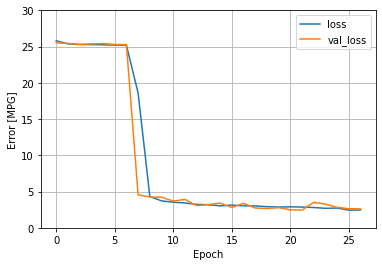

In [105]:
plot_loss(history)

Test

In [133]:
import numpy as np

In [157]:
preds = model.predict(X_test)
preds_df = pd.DataFrame(preds, columns = ['preds'])
test_targets = pd.DataFrame(y_test, columns = ['target']).reset_index().drop(columns = ['index'])
MSE_df = pd.DataFrame(np.square(np.subtract(test_targets['target'], preds_df['preds'])), columns = ['MSE'])
ABS_df = pd.DataFrame(np.abs(np.subtract(test_targets['target'], preds_df['preds'])), columns = ['ABS'])
res_df = preds_df.join([test_targets, ABS_df, MSE_df])

In [158]:
res_df

,preds,target,ABS,MSE
0,72.955215,71.802807,1.152408,1.328045
1,35.137520,39.221327,4.083808,16.677485
2,5.865417,7.676630,1.811213,3.280491
3,85.356689,92.384679,7.027989,49.392635
4,89.907715,93.163612,3.255897,10.600864
...,...,...,...,...
26995,60.447693,55.074054,5.373639,28.875994
26996,71.161842,75.312443,4.150601,17.227487
26997,45.431793,48.627577,3.195784,10.213035
26998,97.066284,95.721972,1.344312,1.807174
